In [73]:
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.transforms import ToTensor, Resize
import os
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder


In [75]:
root_dir = f'{os.getcwd()}/CUB_200_2011/images/'

transform = transforms.Compose([
    Resize((224, 224)),  # Resize images to a fixed size, for example, 224x224
    ToTensor()           # Convert images to tensors
])

dataset = ImageFolder(root=root_dir,transform=transform)
dataset

Dataset ImageFolder
    Number of datapoints: 11788
    Root location: /Users/axelsorensen/xai/XAI/CUB_200_2011/images/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [76]:
train_size = int(0.8 * len(dataset))  # 80% for training
val_size = int(0.1 * len(dataset))    # 10% for validation
test_size = len(dataset) - train_size - val_size  # Remaining for testing

# Split the dataset randomly into train, validation, and test sets
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Print the sizes of the splits
print(f"Train set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")

Train set size: 9430
Validation set size: 1178
Test set size: 1180


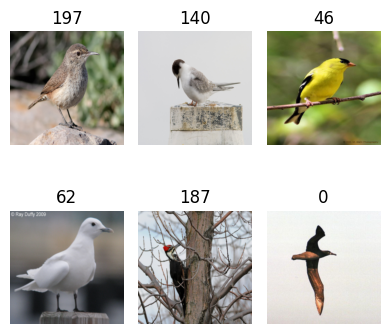

In [99]:
def show_images(dataset, num_images=5):
    # Get random samples from the dataset
    random_indices = torch.randperm(len(dataset))[:num_images]
    plt.figure(figsize=(4,4))
    # Iterate over the random indices and display images
    for index, idx in enumerate(random_indices):
        image, _ = dataset[idx]
  # Convert PIL image to tensor
        plt.subplot(2, 3, index + 1)
        plt.imshow(image.permute(1,2,0))  # Convert tensor to ndarray and display
        plt.axis('off')
        plt.title(_)
    plt.tight_layout()
    plt.show()
    

# Call the function to display images
show_images(dataset, num_images=6)